<a href="https://colab.research.google.com/github/PuliNitishKumar/Data_Science_Projects/blob/main/Spotify_Music_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/spotify-2023.csv',encoding='latin1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [7]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [18]:
clustering_features = ['released_year','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[clustering_features]),columns=clustering_features)
df_scaled

,released_year,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0.428590,0.891096,1.600828,1.131729,0.151729,-0.188132,-0.745256,-0.618829
1,0.428590,0.275624,0.407730,0.587654,-0.771972,-0.188132,-0.599314,-0.618829
2,0.428590,-1.092091,-0.827979,-0.681854,-0.387097,-0.188132,0.933082,-0.416966
3,0.068567,-0.818548,0.279898,0.466749,-0.618022,-0.188132,-0.526342,0.491420
4,0.428590,-0.134690,-1.211475,0.950371,-0.502559,7.307062,-0.526342,-0.416966
...,...,...,...,...,...,...,...,...
948,0.338585,-0.476619,-1.168864,-1.528193,1.152405,-0.188132,-0.745256,-0.719761
949,0.338585,-1.707562,-1.893245,-2.434984,2.153081,-0.069161,-0.453371,-0.416966
950,0.338585,0.891096,1.259943,0.164485,-0.887435,-0.188132,-0.745256,-0.416966
951,0.338585,1.027867,0.663394,0.769012,-0.733484,-0.188132,-0.453371,-0.517897


In [21]:
train_data, test_data = train_test_split(df_scaled, test_size = 0.2, random_state = 0)

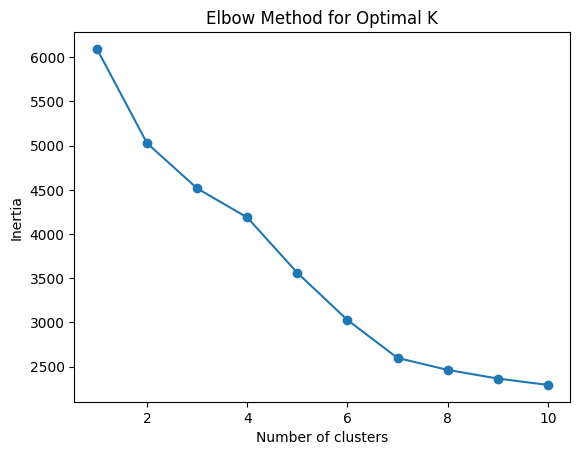

In [32]:
l = []
k_value = range(1,11)

for i in k_value:
  kmeans = KMeans(n_clusters=i, random_state = 0)
  kmeans.fit(train_data)
  l.append(kmeans.inertia_)

plt.plot(k_value,l,marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
df['cluster'] = kmeans.fit_predict(df_scaled)

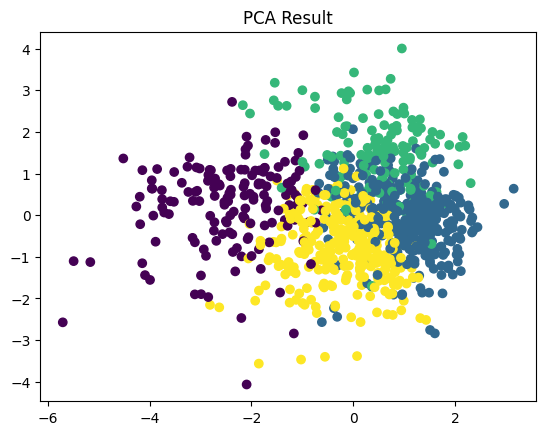

In [47]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
plt.scatter(pca_result[:,0],pca_result[:,1],c=df['cluster'])
plt.title('PCA Result')
plt.show()

In [55]:
def recommend_songs_by_name(song_name):
    if song_name not in df['track_name'].values:
        print(f"Song '{song_name}' not found in the dataset.")

    song_features = df[df['track_name'] == song_name][clustering_features].values[0]
    song_scaled = scaler.transform([song_features])
    song_cluster = kmeans.predict(song_scaled)[0]
    cluster_centroid = kmeans.cluster_centers_[song_cluster]
    distances = np.linalg.norm(df_scaled - cluster_centroid, axis=1)
    closest_song_indices = np.argsort(distances)[:6]
    closest_song_indices = [idx for idx in closest_song_indices if df.iloc[idx]['track_name'] != song_name]
    recommended_songs = df.iloc[closest_song_indices]
    return recommended_songs[['track_name', 'released_year', 'artist(s)_name']]


In [58]:
song_name = 'vampire'
print(f'Recommended songs for {song_name}: \n')
recommended_songs = recommend_songs_by_name(song_name)
print(recommended_songs)


Recommended songs for vampire: 

                   track_name  released_year  \
844                   So Good           2022   
952                     Alone           2022   
724  Something Just Like This           2017   
663                   Formula           2019   
378               My Universe           2021   
855    Crazy What Love Can Do           2022   

                               artist(s)_name  
844                                    Halsey  
952                                 Burna Boy  
724                The Chainsmokers, Coldplay  
663                                  Labrinth  
378                             Coldplay, BTS  
855  David Guetta, Ella Henderson, Becky Hill  
